# **Analyser les données de la dette internationale** - by AHMED

# Importation des données :

In [1]:
import pandas as pd

In [2]:
dette_data = pd.read_csv('international_debt.csv')

# Exploration des données :

In [3]:
dette_data.head()

,country_name,country_code,indicator_name,indicator_code,debt
0,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,72894453.7
1,Afghanistan,AFG,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,53239440.1
2,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,61739336.9
3,Afghanistan,AFG,"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD,49114729.4
4,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,39903620.1


In [4]:
dette_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    2357 non-null   object 
 1   country_code    2357 non-null   object 
 2   indicator_name  2357 non-null   object 
 3   indicator_code  2357 non-null   object 
 4   debt            2357 non-null   float64
dtypes: float64(1), object(4)
memory usage: 92.2+ KB


In [5]:
dette_data.isnull().sum()

,0
country_name,0
country_code,0
indicator_name,0
indicator_code,0
debt,0


In [6]:
dette_data.duplicated().sum()

0

# Nettoyage des données :

# Analyse des données :

## Pays distincts :

nombre de pays :

In [8]:
dette_data['country_name'].nunique()

124

les pays sont présents dans notre jeu de données:

In [9]:
dette_data['country_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Djibouti', 'Dominica',
       'Dominican Republic', 'Georgia', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon',
       'Gambia, The', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'IDA only',
       'India', 'Indonesia', 'Iran, Islamic Rep.', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyz Republic', 'Lao PDR',
       'Lesotho', 'Least developed countries: UN classification',
       'Lebanon', 'Liberia', 'Macedonia, FYR',

##  les types d'indicateurs de dette disponibles dans le jeu de données :

Nombre d'indicateurs de dette distincts

In [11]:
dette_data['indicator_name'].nunique()

25

les indicateurs :

In [10]:
dette_data['indicator_name'].unique()

array(['Disbursements on external debt, long-term (DIS, current US$)',
       'Interest payments on external debt, long-term (INT, current US$)',
       'PPG, bilateral (AMT, current US$)',
       'PPG, bilateral (DIS, current US$)',
       'PPG, bilateral (INT, current US$)',
       'PPG, multilateral (AMT, current US$)',
       'PPG, multilateral (DIS, current US$)',
       'PPG, multilateral (INT, current US$)',
       'PPG, official creditors (AMT, current US$)',
       'PPG, official creditors (DIS, current US$)',
       'PPG, official creditors (INT, current US$)',
       'Principal repayments on external debt, long-term (AMT, current US$)',
       'Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)',
       'PPG, bonds (AMT, current US$)', 'PPG, bonds (INT, current US$)',
       'PPG, commercial banks (AMT, current US$)',
       'PPG, commercial banks (DIS, current US$)',
       'PPG, commercial banks (INT, current US$)',
       'PPG, other privat

## Montant total de la dette des pays :

In [12]:
dette_data.groupby('country_name')['debt'].sum().sort_values(ascending=False)

,debt
country_name,
China,2.857935e+11
Brazil,2.806240e+11
South Asia,2.476087e+11
Least developed countries: UN classification,2.128810e+11
Russian Federation,1.912891e+11
...,...
Turkmenistan,9.513563e+07
Timor-Leste,7.100096e+07
Comoros,5.756848e+07


10 pays les plus endettés

In [14]:
import matplotlib.pyplot as plt

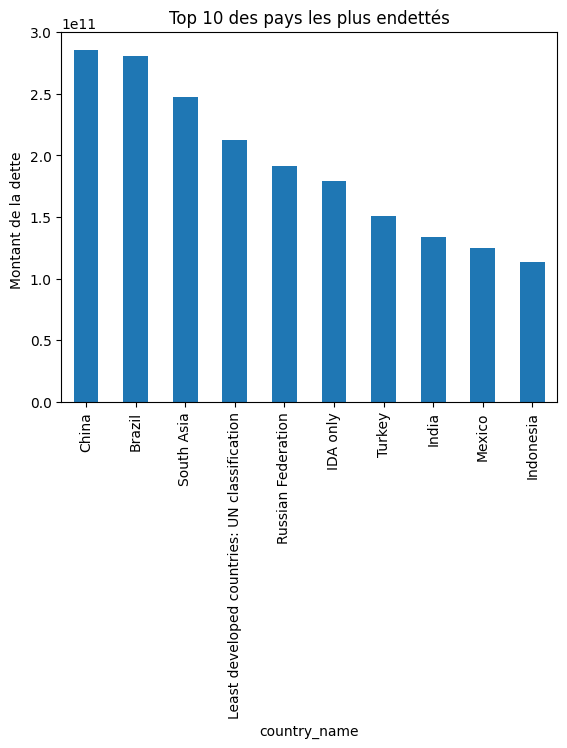

In [17]:
top = dette_data.groupby('country_name')['debt'].sum().sort_values(ascending=False).head(10)
top.plot(kind='bar', title="Top 10 des pays les plus endettés")
plt.ylabel('Montant de la dette ')
plt.show()

## Montant moyen de la dette selon les indicateurs

In [18]:
dette_data.groupby('indicator_name')['debt'].mean().sort_values(ascending=False)

,debt
indicator_name,
"Principal repayments on external debt, long-term (AMT, current US$)",5.904868e+09
"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",5.161194e+09
"Disbursements on external debt, long-term (DIS, current US$)",2.152041e+09
"PPG, official creditors (DIS, current US$)",1.958983e+09
"PPG, private creditors (AMT, current US$)",1.803694e+09
"Interest payments on external debt, long-term (INT, current US$)",1.644024e+09
"PPG, bilateral (DIS, current US$)",1.223139e+09
"Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)",1.220411e+09
"PPG, official creditors (AMT, current US$)",1.191188e+09


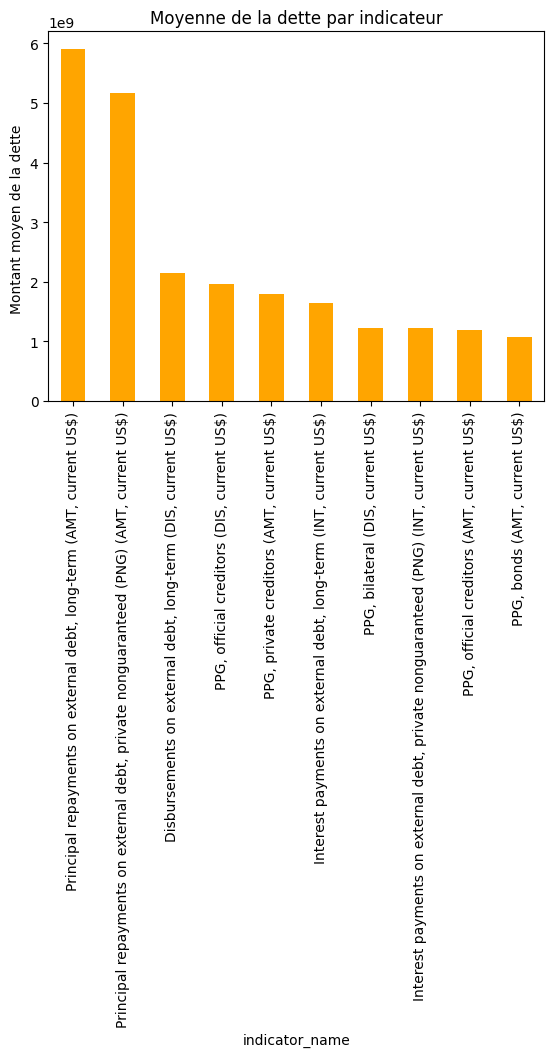

In [20]:
moyenne_par_indicateur = dette_data.groupby('indicator_name')['debt'].mean().sort_values(ascending=False).head(10)
moyenne_par_indicateur.plot(kind='bar', color='orange', title="Moyenne de la dette par indicateur")
plt.ylabel('Montant moyen de la dette ')
plt.show()
